<a href="https://colab.research.google.com/github/guiaech/PI-final/blob/main/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importar a função cv2_imshow do pacote google.colab.patches**
A função cv2_imshow é específica do ambiente de execução do Google Colab, que é uma plataforma de notebooks interativos baseada na nuvem. A função cv2_imshow é uma modificação do cv2.imshow padrão da biblioteca OpenCV. No Google Colab, o cv2.imshow não funciona diretamente, então o cv2_imshow é fornecido para exibir imagens de forma mais conveniente no ambiente do Colab.

Esta função permite que você visualize imagens diretamente no ambiente do Colab, sem a necessidade de salvar a imagem em um arquivo e, em seguida, exibi-la externamente. Portanto, a importação da função cv2_imshow do pacote google.colab.patches é necessária para que as imagens geradas pelo código possam ser exibidas corretamente dentro do ambiente do Google Colab.

In [1]:
from google.colab.patches import cv2_imshow

## **Conectar ao Google Drive**
Importa a biblioteca drive do Google Colab para montar o Google Drive no ambiente. Isso permite acessar arquivos do Drive pelo caminho '/content/drive'.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importar bibliotecas**

As bibliotecas torch e cv2 têm diferentes propósitos e são frequentemente utilizadas em tarefas específicas:

torch (PyTorch):

*  Propósito: PyTorch é um framework de aprendizado profundo (deep learning) de
código aberto. Ele é amplamente utilizado para construir, treinar e implementar modelos de redes neurais.
Uso no Código: Neste código, PyTorch é usado para carregar um modelo de detecção de objetos YOLOv5 pré-treinado, movê-lo para a GPU (se disponível) e realizar a inferência nas imagens.
cv2 (OpenCV):

*  Propósito: OpenCV (Open Source Computer Vision Library) é uma biblioteca amplamente utilizada para visão computacional e processamento de imagens. Ela oferece uma variedade de funções para manipulação de imagens, detecção de objetos, reconhecimento de padrões, entre outros.
Uso no Código: Neste código, OpenCV é usado para ler imagens, desenhar bounding boxes (caixas delimitadoras) em volta dos objetos detectados e exibir a imagem resultante. Além disso, é utilizado para outras operações relacionadas ao processamento de imagens.

Resumidamente, o PyTorch (torch) é usado para tarefas relacionadas a aprendizado profundo, enquanto o OpenCV (cv2) é usado para operações de visão computacional e processamento de imagens. No contexto específico desse código, essas bibliotecas são combinadas para realizar detecção de objetos em imagens utilizando o modelo YOLOv5.

In [3]:
import torch
import cv2

## **Definir dispositivo**
Nessa linha o código está definindo CUDA. Ele define o dispositivo (device) como CUDA, indicando que o código deve utilizar a GPU para operações de tensor do PyTorch.

Isso é feito para garantir que o código seja executado de forma eficiente, aproveitando a aceleração de hardware oferecida por GPUs quando possível. O PyTorch, por padrão, realiza operações em CPU, mas ao especificar cuda, você está indicando que, se uma GPU estiver disponível, as operações devem ser executadas nela, o que geralmente é mais rápido para modelos de aprendizado profundo.

In [4]:
device = torch.device('cuda')

## **Carregar modelo YOLOv5**
Tem como objetivo carregar um modelo YOLOv5 pré-treinado do repositório ultralytics/yolov5 no PyTorch Hub.

Aqui estão algumas explicações:

1. **YOLOv5:**
*  YOLO (You Only Look Once) é uma arquitetura de detecção de objetos que, em vez de dividir uma imagem em regiões e classificar cada região separadamente (como em muitas arquiteturas anteriores), trata a detecção de objetos como um problema de regressão para predizer as bounding boxes e as classes diretamente.
*  O "v5" refere-se à versão 5 da arquitetura YOLO.

2. **ultralytics/yolov5:**
   - O repositório ultralytics/yolov5 é mantido pela Ultralytics, e contém implementações da arquitetura YOLOv5 em PyTorch.

3. **torch.hub.load:**
*   `torch.hub` é uma funcionalidade do PyTorch que permite carregar modelos e outros recursos de maneira fácil e direta a partir de repositórios específicos no GitHub.
*  `torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)` carrega o modelo YOLOv5s pré-treinado do repositório ultralytics/yolov5.

4. **pretrained=True:**
*  O argumento `pretrained=True` indica que queremos usar uma versão pré-treinada do modelo. Modelos pré-treinados são treinados em grandes conjuntos de dados e podem ser ajustados para tarefas específicas sem a necessidade de treinamento desde o início.

Portanto, essa linha de código carrega uma implementação específica do modelo YOLOv5 (a versão pequena, 'yolov5s') que foi treinada anteriormente em um conjunto de dados amplo para detecção de objetos. Este modelo pré-treinado pode então ser usado para realizar a detecção de objetos em novas imagens sem a necessidade de treinar o modelo novamente a partir do zero.

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 199.3 MB/s e

## **Mover modelo para GPU**

1. **`model.to(device)`:**
*   Esta linha de código utiliza o método `to` do PyTorch para mover o modelo para o dispositivo especificado. O dispositivo uma GPU.
*   O argumento `device` é uma variável que representa o dispositivo e foi definido anteriormente da GPU usando.

2. **Motivação:**
*   Mover o modelo para a GPU é feito para aproveitar a aceleração de hardware oferecida por GPUs, que são especialmente eficientes em operações matriciais e cálculos intensivos, comuns em redes neurais. Isso pode resultar em uma significativa melhoria no desempenho em comparação com a execução na CPU.


Portanto, esta linha de código é uma prática comum em aprendizado profundo para otimizar o desempenho durante a inferência, aproveitando o poder de **processamento paralelo** oferecido por GPUs.

In [ ]:
model.to(device)

## **Definir modelo para inferência**

1. **`model.eval()`:**
*    Este método do PyTorch é usado para colocar o modelo em modo de avaliação (inferência). Quando um modelo está em modo de avaliação, ele opera de maneira diferente do modo de treinamento.
*    Durante o treinamento, os modelos geralmente têm camadas como dropout e normalização que são úteis para regularização e adaptação aos dados de treinamento. No entanto, durante a inferência, essas camadas podem ter comportamentos indesejados, como introduzir aleatoriedade nos resultados.

2. **Motivação:**
*     Colocar o modelo em modo de inferência desativa essas camadas específicas, como dropout, que introduzem aleatoriedade durante o treinamento. Durante a inferência, queremos que o modelo forneça resultados determinísticos e consistentes.
*    Além disso, algumas camadas, como a camada de normalização, podem ter parâmetros diferentes durante o treinamento e a inferência. Desativar essas camadas durante a inferência garante que o modelo seja consistente com os resultados obtidos durante o treinamento.

3. **Uso Prático:**
*    Esta prática é importante ao usar o modelo para realizar predições em novos dados, como no caso deste código, onde o modelo YOLOv5 é usado para inferir objetos em uma imagem.
*    Durante o treinamento, o modelo é ajustado para se adaptar aos dados de treinamento, mas durante a inferência, queremos que o modelo utilize essa adaptação para fazer previsões em novos dados de maneira consistente.

Portanto, a chamada `model.eval()` é uma boa prática ao realizar inferência com modelos treinados, garantindo que o modelo opere de maneira determinística e consistente com o treinamento.

In [ ]:
model.eval()

## **Ler imagem**
Lê a imagem do caminho especificado no Google Drive usando OpenCV.

In [8]:
img = cv2.imread('/content/drive/MyDrive/foto/puc.jpg')

## **Fazer inferência**

Passa a imagem pelo modelo YOLOv5 e obtém os resultados da detecção.

1. **`model(img)`:**
*   Esta linha de código passa a imagem `img` pelo modelo YOLOv5. Isso significa que a imagem está sendo processada pelo modelo para realizar a detecção de objetos.
*   O modelo YOLOv5 é uma rede neural que foi treinada para detectar objetos em imagens, e este passo de inferência é onde ele faz as previsões com base nos padrões aprendidos durante o treinamento.

2. **`results`:**
*   A saída da inferência é armazenada na variável `results`. Essa variável provavelmente contém informações sobre os objetos detectados na imagem, como as coordenadas das bounding boxes, as classes dos objetos, e possivelmente confiança associada a cada detecção.

3. **Uso dos Resultados:**
*    Os resultados obtidos são, então, geralmente utilizados para análises adicionais ou para tomar decisões com base nas detecções feitas pelo modelo. No contexto deste código, a próxima etapa é extrair as bounding boxes dos resultados para análises posteriores.

4. **Objetivo Geral:**
*   O objetivo geral dessa linha é obter informações sobre quais objetos estão presentes na imagem e onde eles estão localizados, utilizando o modelo YOLOv5 previamente treinado.

Em resumo, essa linha é crucial para o processo de detecção de objetos, fornecendo os resultados da inferência que serão utilizados nas etapas subsequentes do código.

In [9]:
results = model(img)

## **Pegar bounding boxes**

1. **`results.pandas()`:**
*   `results` é uma estrutura de dados que contém as informações da detecção feita pelo modelo, como as coordenadas das bounding boxes, as classes dos objetos, e outras informações relevantes.
   - `results.pandas()` converte essas informações em um DataFrame do Pandas, que é uma estrutura de dados tabular eficiente para manipulação e análise de dados.

2. **`.xyxy[0]`:**
*    A notação `.xyxy` é usada para acessar as coordenadas das bounding boxes no formato (xmin, ymin, xmax, ymax), que representam os pontos extremos das caixas delimitadoras retangulares.
*    O índice `[0]` é utilizado para acessar os resultados da detecção para o primeiro conjunto de objetos detectados na imagem.

3. **`boxes`:**
*   A variável `boxes` armazena essas bounding boxes em um formato conveniente, permitindo que sejam facilmente acessadas e manipuladas posteriormente no código.
*   Cada linha desse DataFrame representa uma bounding box, e as colunas podem incluir informações como coordenadas, classe do objeto e confiança associada à detecção.

4. **Objetivo Geral:**
*    O propósito geral dessa linha é estruturar as informações sobre as bounding boxes de forma organizada para facilitar a análise posterior. Essas informações serão usadas nas próximas etapas do código, como contar o número de pessoas detectadas e desenhar as bounding boxes na imagem original.

Portanto, essa linha é essencial para extrair e organizar as informações das bounding boxes resultantes da detecção de objetos na imagem.

In [10]:
boxes = results.pandas().xyxy[0]

## **Contador de pessoas**


In [11]:
count = 0

## **Percorrer bounding boxes e verificar se é uma pessoa**


1. **`for index, row in boxes.iterrows():`**
*    `boxes.iterrows()` é um método do Pandas que permite iterar sobre as linhas de um DataFrame. Ele retorna pares `(index, row)`, onde `index` é o índice da linha e `row` é uma série contendo os valores dessa linha.
*    No contexto deste código, cada linha do DataFrame `boxes` representa uma bounding box associada a um objeto detectado.

2. **Iteração:**
*    O loop `for` está sendo utilizado para iterar sobre todas as bounding boxes detectadas na imagem. Cada iteração fornece acesso a uma linha do DataFrame, onde as informações sobre uma bounding box específica estão armazenadas.

3. **`index` e `row`:**
*    `index` é o índice da linha no DataFrame (pode ser útil para referenciar a linha específica).
*    `row` é uma série que contém os valores associados a essa linha, ou seja, as coordenadas da bounding box, classe do objeto, confiança, etc.

4. **Objetivo Geral:**
*    O objetivo principal dessa iteração é permitir o acesso e processamento individual das informações de cada bounding box detectada. Isso pode incluir verificações, contagens, desenhos ou outras operações específicas associadas a cada detecção.

5. **Uso Prático no Código:**
*    No contexto deste código, o loop está sendo utilizado para verificar se a classe associada à bounding box é uma pessoa (`if row['name'] == 'person'`) e, caso positivo, incrementar um contador (`count += 1`). Esta é uma maneira de contar o número total de pessoas detectadas na imagem.

Portanto, essa linha de código é essencial para percorrer e processar individualmente as informações associadas a cada bounding box detectada na imagem.

In [12]:
for index, row in boxes.iterrows():
    if row['name'] == 'person':
        count += 1

## **Imprimir total de pessoas**

1. **`print(f'Total de pessoas detectadas: {count}')`:**
*    Esta linha utiliza a função `print` para exibir uma mensagem na saída padrão (geralmente, a tela ou o console).
*    A mensagem exibida é formatada usando uma f-string (format string), onde `{count}` é substituído pelo valor da variável `count`.

2. **`count`:**
*    `count` é uma variável que foi utilizada anteriormente no código para contar o número de bounding boxes associadas a objetos da classe "person" (pessoas).

3. **Objetivo Geral:**
*    O propósito dessa linha é fornecer ao usuário ou desenvolvedor uma informação visual sobre o número total de pessoas detectadas na imagem após a análise do modelo YOLOv5.

4. **Uso Prático no Código:**
*    No contexto deste código, o `print` é usado para comunicar o resultado da contagem de pessoas ao usuário. Essa informação pode ser útil para análise, relatórios ou tomada de decisões com base nas detecções feitas pelo modelo.

Portanto, essa linha é uma parte importante para comunicar o resultado da análise, tornando a saída mais interpretável para quem está utilizando o código.

In [13]:
print(f'Total de pessoas detectadas: {count}')

Total de pessoas detectadas: 15


## **Desenhar bounding boxes**
1. **`for index, row in boxes.iterrows():`**
*    Isso inicia um loop que itera sobre todas as linhas do DataFrame `boxes`, onde cada linha contém informações sobre uma bounding box.

2. **`x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])`:**
*    Esta linha extrai as coordenadas da bounding box atual. `row['xmin']`, `row['ymin']`, `row['xmax']`, e `row['ymax']` representam as coordenadas das extremidades da bounding box (canto superior esquerdo e canto inferior direito).
*    As coordenadas são convertidas para inteiros para serem utilizadas na função `cv2.rectangle`.

3. **`cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)`:**
*    A função `cv2.rectangle` é usada para desenhar um retângulo na imagem `img`.

   Os parâmetros são:
      - `img`: A imagem na qual o retângulo será desenhado.
      - `(x1, y1)`: Coordenadas do canto superior esquerdo do retângulo.
      - `(x2, y2)`: Coordenadas do canto inferior direito do retângulo.
      - `(0,255,0)`: Cor do retângulo no formato BGR. Neste caso, é verde, indicado por `(0,255,0)`.
      - `2`: Espessura da linha que forma o retângulo.

4. **Objetivo Geral:**
*    O objetivo geral é visualizar as bounding boxes na imagem original para que os usuários ou desenvolvedores possam ver as áreas onde o modelo detectou objetos.
*    Essa etapa é útil para validar visualmente as detecções feitas pelo modelo e entender como ele está interpretando a imagem.

Portanto, esta seção de código é crucial para a visualização dos resultados da detecção na imagem original, proporcionando uma forma de interpretação visual das detecções feitas pelo modelo YOLOv5.

In [14]:
for index, row in boxes.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

## **Exibir imagem**

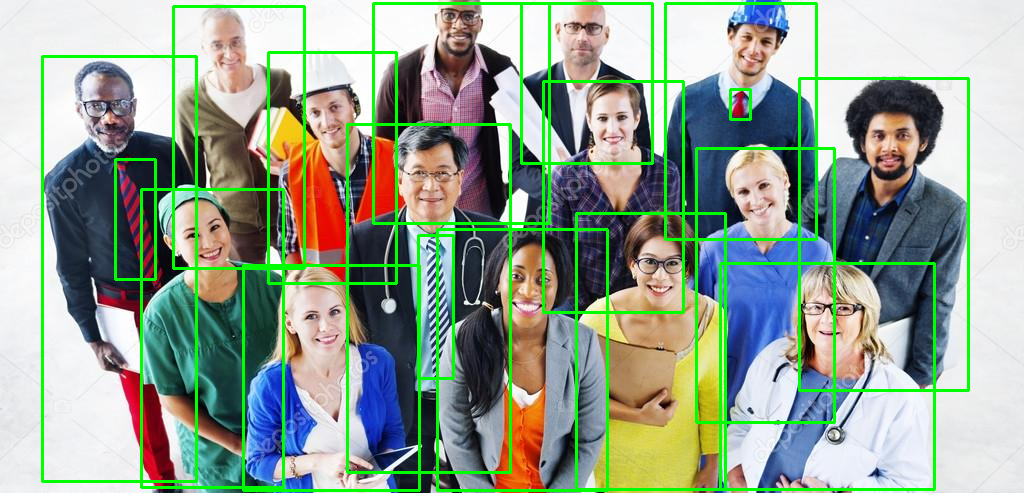

-1

In [15]:
cv2_imshow(img)
cv2.waitKey(0)